**"Advanced Machine Learning for Credit Card Fraud Detection: A Comprehensive Analysis Using Transformers, NLP, and Emerging Technologies"**

### 1 **Problem Definition**
The project revolves around the critical challenge of detecting credit card fraud, which has been a persistent and paramount challenge for the finance sector. With the increase in digital transactions, it is imperative to detect and prevent fraudulent activities that would otherwise lead to loss of financial assets and loss of customers' confidence. This is a problem of finding suspicious patterns in transactional data, which point to the identification of fraudulent activities but with minimal interference with legitimate transactions. The problem can only be addressed through advanced use of machine learning and big data analysis strategies to overcome the disparate challenges that create class imbalance, changing patterns of fraudulent behavior, and real-time detection.
This project is designed to create a reliable and scalable fraud-detection solution tailored to the complexity of modern financial ecosystems.

The project focuses on leveraging advanced machine learning and deep learning techniques, including transformers and NLP. The approach creates a scalable and efficient fraud detection system, thus including the following functionalities:

1. Analyzing large-scale transactional datasets to detect fraudulent activities.
2. Handling class imbalance effectively using oversampling, undersampling, or cost-sensitive learning methods.
3. Compare the transformer-based architectures compared to traditional machine learning and neural networks for credit card fraud detection.
4. Implement efficient evaluation metrics such as precision, recall, F1-score, and AUC-ROC to make it more reliable.
5. Use contextual embeddings or pre-trained models to enhance feature representation and prediction accuracy.

In [15]:
# pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.2 MB/s eta 0:00:00


### Import Libraries


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import auc

### 2. Data Preprocessing Pipeline

This script describes data preprocessing for the Credit Card Fraud Detection project. It starts with loading datasets: a training one as fraudTrain.csv and a testing one as fraudTest.csv, deletes inessential columns personal identifiers and transaction metadata. Datetime values normalized by replacing trans_date_trans_time and dob columns with proper formats and others features such as transaction hour and day, month, and customer age were engineered. Original datetime values were then dropped.

Categorical features like merchant, category, gender, and state are encoded using LabelEncoder to transform them into numeric formats accessible for machine learning models. Numerical features like transaction amount, geographic coordinates, and age are standardized by StandardScaler to enhance model performance. The target variable is split from the features for training and testing dataset X_train, X_test, y_train, y_test:.

It also checks the completeness of the data set by testing for missing values and data types so the preprocessing steps run all the way through to completion. Finally, it prints the final shapes and columns of the datasets, ready for model training and evaluation. This comprehensive preprocessing pipeline has been most crucial in the development of effective fraud models.

In [17]:
# loading the data
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

# now dropping the unnecessary columns which is not required
unwanted_columns = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'job', 'trans_num']
train_data.drop(columns=unwanted_columns, inplace=True)
test_data.drop(columns=unwanted_columns, inplace=True)

# converting datetime columns for cleaning data
for data in [train_data, test_data]:
    data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
    data['dob'] = pd.to_datetime(data['dob'])

    # feature Engineering
    data['trans_hour'] = data['trans_date_trans_time'].dt.hour
    data['trans_day'] = data['trans_date_trans_time'].dt.day
    data['trans_month'] = data['trans_date_trans_time'].dt.month
    data['age'] = (data['trans_date_trans_time'].dt.year - data['dob'].dt.year)

    # drop original datetime columns
    data.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)

# encoding the categorical features
label_encoder = LabelEncoder()
category_columns = ['merchant', 'category', 'gender', 'state']
for column in category_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# here normalizing the numerical features
scaler = StandardScaler()
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age']
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# set the target column
target_train = train_data['is_fraud']
target_test = test_data['is_fraud']

# dropping target column from features
features_train = train_data.drop(columns=['is_fraud'])
features_test = test_data.drop(columns=['is_fraud'])

# check no missing values
print("Missing Values in Training Data:\n", train_data.isnull().sum())
print("\nMissing Values in Test Data:\n", test_data.isnull().sum())

# check data types
print("\nData Types in Training Data:\n", train_data.dtypes)
print("\nData Types in Test Data:\n", test_data.dtypes)

# check the final shape of the datasets
print("\nFinal Training Data Shape:", train_data.shape)
print("Final Test Data Shape:", test_data.shape)

print(train_data.columns)
print(test_data.columns)

Missing Values in Training Data:
 merchant       0
category       0
amt            0
gender         0
state          0
zip            0
lat            0
long           0
city_pop       0
unix_time      0
merch_lat      0
merch_long     0
is_fraud       0
trans_hour     0
trans_day      0
trans_month    0
age            0
dtype: int64

Missing Values in Test Data:
 merchant       0
category       0
amt            0
gender         0
state          0
zip            0
lat            0
long           0
city_pop       0
unix_time      0
merch_lat      0
merch_long     0
is_fraud       0
trans_hour     0
trans_day      0
trans_month    0
age            0
dtype: int64

Data Types in Training Data:
 merchant         int64
category         int64
amt            float64
gender           int64
state            int64
zip              int64
lat            float64
long           float64
city_pop       float64
unix_time        int64
merch_lat      float64
merch_long     float64
is_fraud         int64
t

#### Missing Values Analysis:
- Training Data: The "Missing Values" summary indicates all of the columns hold 0s, indicating no missing values exist in any column within the training data. All of the features from merchants through age are complete.
- Test Data: There is no missing value in the test dataset as well. All columns of this test data have 0 missing values. Therefore, the training and test datasets are absolutely complete and thus fit for analysis.

#### Data Types:
- Training Data: The feature types in the training data were mostly integers, int64 in most cases. Several columns, such as amt, lat, long, city_pop, and age are of type float64. Additionally, the target variable is_fraud was of type int64 since the dataset has been designed for a binary classification problem.
- Test Data: The test dataset has the same data types of the training data. So, the feature types for both the training and test data are consistent; thus, no data type issues occur during model training or evaluation.

#### Dataset Shapes:
- Training Data Shape: 1,296,675 rows × 17 columns. This is a lot of data covering almost every aspect and dimension that can make the training of a strong machine learning robust.
- Test Data Shape: 555,719 rows × 17 columns. Pretty big in size too, so this test data will be really crucial for evaluating the model after training.

### 3. Exploratory Data Analysis (EDA)

1. **Class Distribution (Fraud vs Non-Fraud):**
   - Use a count plot to visualize the target variable `is_fraud`. The count plot shows the number of fraudulent versus non-fraudulent transactions-it gives an idea about how skewed the class is.
  
2. **Transaction Amount Distribution (Log Scale):**
  - A histogram is plotted to display the distribution of transaction amounts (`amt`). Because the data was so spread out, `log_scale=True` was needed to allow for plotting because of the wide value range; logarithmic scale data becomes much more recognizable when skewed.

3. **Compare transaction amount by status for fraud transactions:**
  - Compare transaction amount between fraud and non-fraud transactions. It will determine if there are any differences between the amounts distributions and detect any possible outliers.

4. **Count of Transaction per Category:**
  - We will display how many transactions exist in each category using a count plot. The plot will help us to view which categories are more frequently occurring within our dataset.

5. **Fraud Rate by Category:**
   - A bar plot shows the fraud rate for each category by calculating the average fraud occurrence within each category. This allows us to identify which categories have the highest proportion of fraudulent transactions.

6. **Correlation Heatmap:**
  - Heatmap is plotted to display the correlation matrix between numerical features like `amt,` `city_pop,` `lat,` `long,` and so on. A heat map will allow one to look for the relationship between these features and assess possible collinearity.


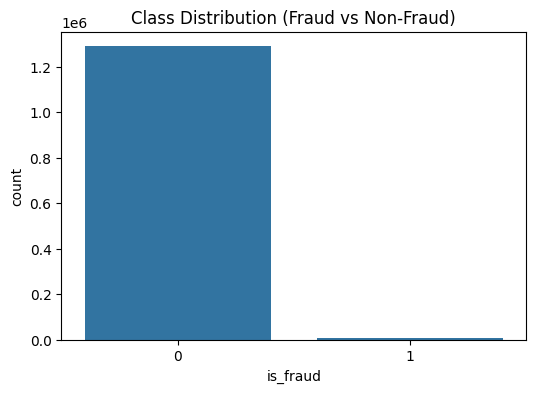

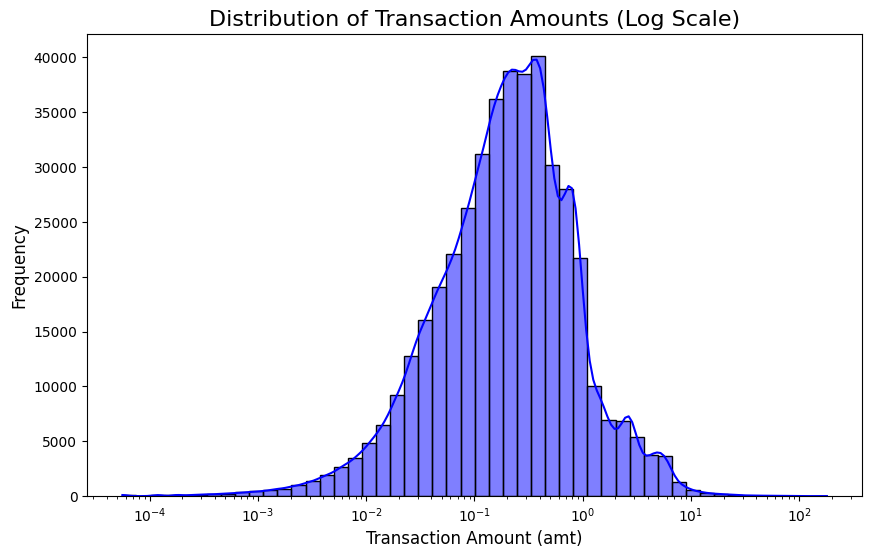

<ipython-input-18-7b95bf55fc07>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='is_fraud', y='amt', palette='coolwarm', showfliers=False)


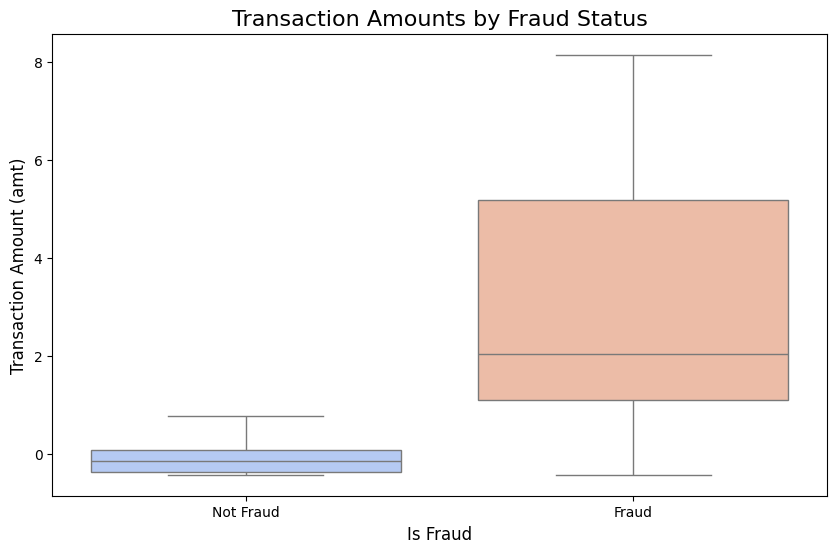

<ipython-input-18-7b95bf55fc07>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='category', order=train_data['category'].value_counts().index, palette='viridis')


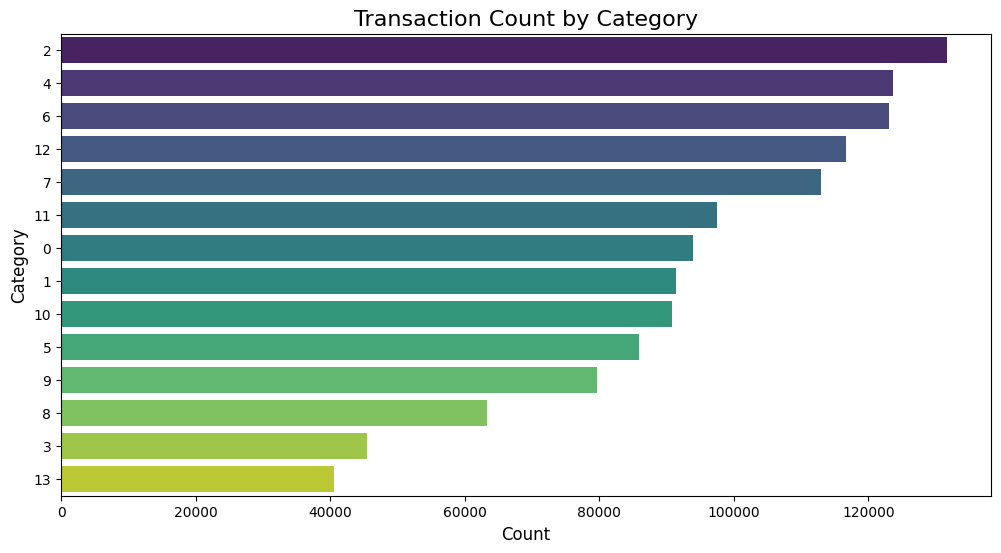

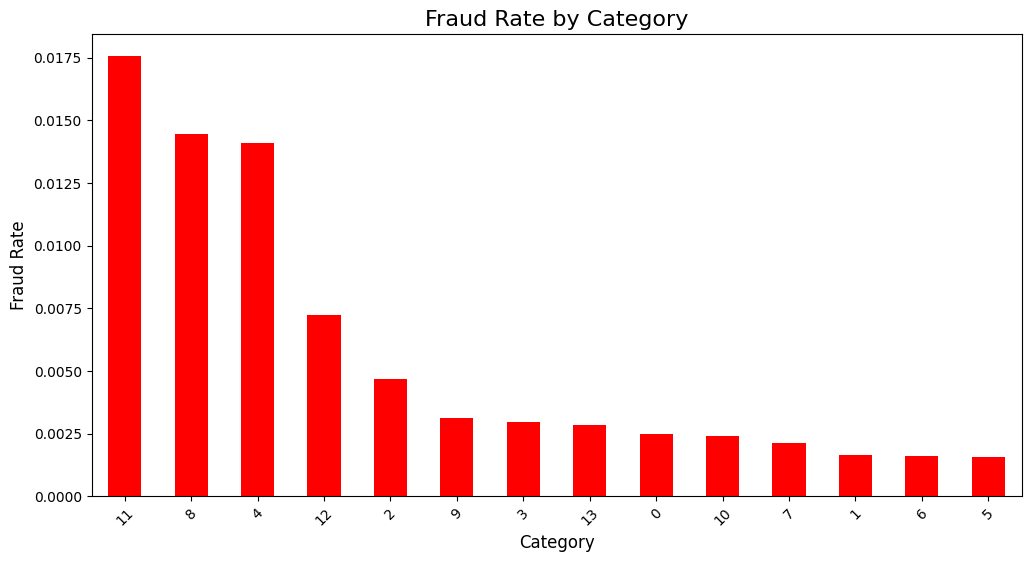

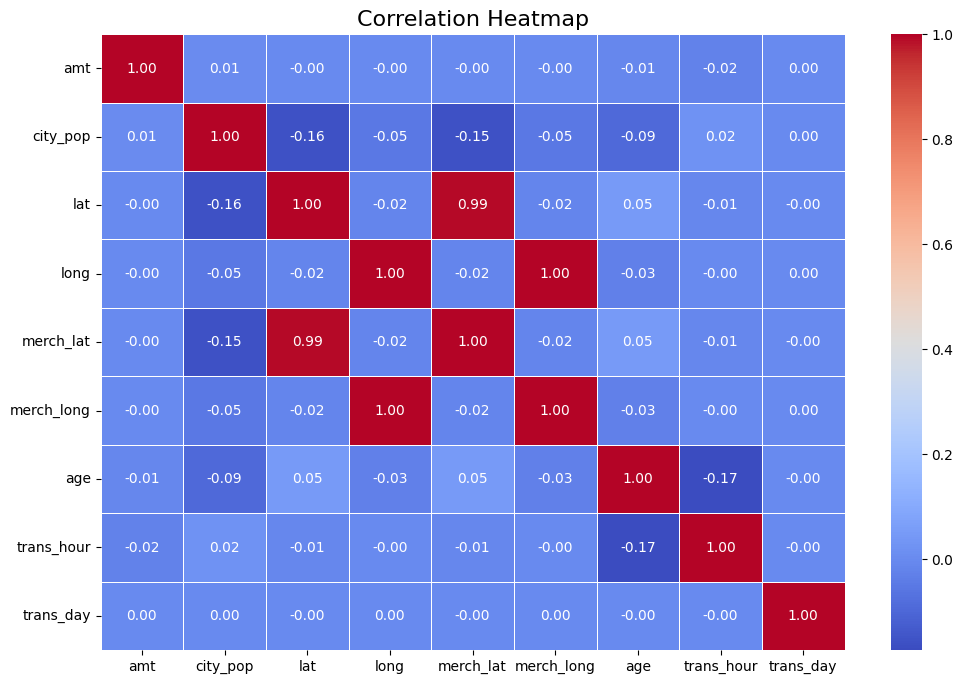

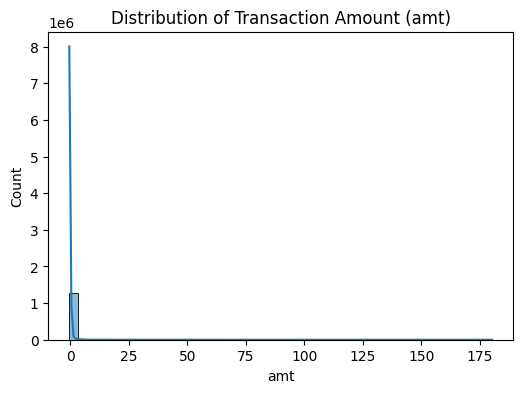

In [18]:
# 1. visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()

# 2. plot the distribution of amt
plt.figure(figsize=(10, 6))
sns.histplot(train_data['amt'], bins=50, kde=True, color='blue', log_scale=True)
plt.title('Distribution of Transaction Amounts (Log Scale)', fontsize=16)
plt.xlabel('Transaction Amount (amt)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 3. compare amt for fraud vs. non-fraud transactions
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='is_fraud', y='amt', palette='coolwarm', showfliers=False)
plt.title('Transaction Amounts by Fraud Status', fontsize=16)
plt.xlabel('Is Fraud', fontsize=12)
plt.ylabel('Transaction Amount (amt)', fontsize=12)
plt.xticks([0, 1], labels=['Not Fraud', 'Fraud'], fontsize=10)
plt.show()

# 4. countplot for categories
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, y='category', order=train_data['category'].value_counts().index, palette='viridis')
plt.title('Transaction Count by Category', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

# 5. fraud distribution across categories
plt.figure(figsize=(12, 6))
fraud_by_category = train_data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_category.plot(kind='bar', color='red')
plt.title('Fraud Rate by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 6. compute correlation matrix
correlation_matrix = train_data[['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'age', 'trans_hour', 'trans_day']].corr()
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


### 4. Model Building

Used two models:

1. **Feature Selection and Data Splitting**:
   - The dataset is split into a training set and a validation set using `train_test_split()` from scikit-learn. The training size is taken as 80% of the data while 20% of the data is for validation (`test_size=0.2`)
  - This is crucial so that it's trained on the majority part of the data, however, the validation set will be of help while evaluating the model during training.

2. **Balancing the Dataset using SMOTE**:
   - SMOTE is applied by using `SMOTE()` from the `imblearn`. This involves adding synthetic samples for the minority class that is fraudulent transactions to balance the class distribution.
  - Especially in case of imbalanced classes, this helps improve the learning abilities of the model by learning from the underrepresented class.

3. **Random Forest Model (Baseline Model)**:
  - A Random Forest Classifier is trained on balanced training data (features_train_balanced, target_train_balanced). The number of trees used is 100 (n_estimators=100).
  - Random Forest is an ensemble method that builds multiple decision trees and aggregates their results for better accuracy and reduced overfitting.
  - Evaluations: Accuracy, precision, recall, F1-score, and AUC-ROC are evaluated on the model. These types of evaluation metrics wholly describe the classification ability of the model.

4. **TabNet Model**:
   - TabNet: Even more advanced model that is specifically implemented to handle tabular data. In this case, the `TabNetClassifier` from the `pytorch-tabnet` library.
  - This will train the model using `features_train_balanced` and test it on the validation set, `features_val`.
  - Evaluation: Similarly, the same set of performance metrics is computed for TabNet: accuracy, precision, recall, F1-score, AUC-ROC, in comparison to Random Forest, in order to see if it does better on the task.




Random Forest Model Evaluation:
Accuracy: 0.9973
Precision: 0.6567
Recall: 0.6448
F1-Score: 0.6507
AUC-ROC: 0.8217


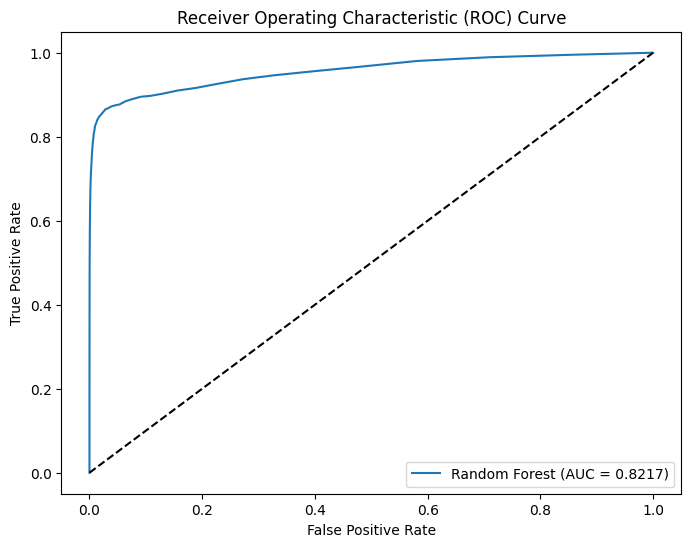

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.22    | val_0_auc: 0.96653 |  0:01:56s
epoch 1  | loss: 0.19005 | val_0_auc: 0.97443 |  0:03:50s
epoch 2  | loss: 0.18377 | val_0_auc: 0.97889 |  0:05:46s
epoch 3  | loss: 0.17803 | val_0_auc: 0.97672 |  0:07:41s
epoch 4  | loss: 0.17379 | val_0_auc: 0.9719  |  0:09:35s
epoch 5  | loss: 0.17102 | val_0_auc: 0.96737 |  0:11:29s
epoch 6  | loss: 0.17199 | val_0_auc: 0.96894 |  0:13:22s
epoch 7  | loss: 0.17313 | val_0_auc: 0.96014 |  0:15:15s
epoch 8  | loss: 0.17035 | val_0_auc: 0.97625 |  0:17:10s
epoch 9  | loss: 0.16966 | val_0_auc: 0.97245 |  0:19:05s
Stop training because you reached max_epochs = 10 with best_epoch = 2 and best_val_0_auc = 0.97889


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



TabNet Model Evaluation:
Accuracy: 0.9512
Precision: 0.0667
Recall: 0.8956
F1-Score: 0.1241
AUC-ROC: 0.9235


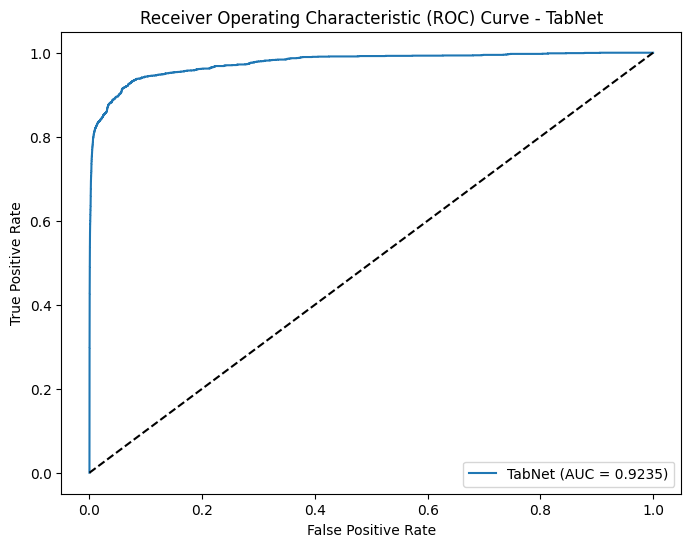

In [19]:
# 4a. feature Selection and Data Splitting
features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

# 4b: Balancing the dataset using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
features_train_balanced, target_train_balanced = smote.fit_resample(features_train, target_train)

# 4c: Baseline Model with Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features_train_balanced, target_train_balanced)

# predicting with the Random Forest model
rf_predictions = rf_classifier.predict(features_test)
accuracy_rf = accuracy_score(target_test, rf_predictions)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(target_test, rf_predictions, average='binary')
roc_auc_rf = roc_auc_score(target_test, rf_predictions)

# evaluating for Random Forest
print(f"Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")

# rOC Curve for Random Forest
fpr, tpr, thresholds = roc_curve(target_test, rf_classifier.predict_proba(features_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.4f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 4d. TabNet Model
# training the TabNet model
tabnet_classifier = TabNetClassifier(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr=2e-2), mask_type='sparsemax')

# fitting the model
tabnet_classifier.fit(features_train_balanced.values, target_train_balanced.values, eval_set=[(features_val.values, target_val.values)],
                 max_epochs=10, batch_size=1024, virtual_batch_size=128, num_workers=0)

# predicting with the TabNet model
tabnet_predictions = tabnet_classifier.predict(features_test.values)

# lets computing evaluation metrics for TabNet
accuracy_tabnet = accuracy_score(target_test, tabnet_predictions)
precision_tabnet, recall_tabnet, f1_tabnet, _ = precision_recall_fscore_support(target_test, tabnet_predictions, average='binary')
roc_auc_tabnet = roc_auc_score(target_test, tabnet_predictions)

# evaluate for TabNet
print(f"\nTabNet Model Evaluation:")
print(f"Accuracy: {accuracy_tabnet:.4f}")
print(f"Precision: {precision_tabnet:.4f}")
print(f"Recall: {recall_tabnet:.4f}")
print(f"F1-Score: {f1_tabnet:.4f}")
print(f"AUC-ROC: {roc_auc_tabnet:.4f}")

# rOC Curve for TabNet
fpr, tpr, thresholds = roc_curve(target_test, tabnet_classifier.predict_proba(features_test.values)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='TabNet (AUC = {:.4f})'.format(roc_auc_tabnet))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve - TabNet')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The Random Forest model performed well and achieved a high accuracy of 0.9973, with an AUC-ROC of 0.8217, indicating that it performs well in distinguishing fraudulent transactions from legitimate transactions. The very good precision of 0.6567 and recall of 0.6448 signifies that the model strikes an excellent balance between actual positives and low false negatives. The overall F1-score of 0.6507 shows a moderate performance; that is, it may be concluded reasonably that it works pretty well both in terms of detection and fraud classification but there is lots of room for improvement, specifically in suppressing false positives.

The TabNet model presented an excellent ability to detect fraud too: with an accuracy of 0.9512 and AUC-ROC of 0.9235. However, the precision was very low at 0.0667; therefore, although it is very good at picking up fraudulent transactions (good recall of 0.8956), it lets many false positives bleed through. This is further reflected in the F1-score of 0.1241, which suggests that the model has a problem achieving good performance balance. The model improved significantly during the training course and hit its best validation AUC at 0.97889 during the second epoch. However, further improvement is still in order, especially in enhancing the precision level and minimizing false alarms.



### 5: Using an Additional Library (PyTorch)

1. **Feature Scaling**:
   - In the context of the code above, one shall scale the features using the StandardScaler of the scikit-learn library for data normalization before feeding it into the neural network. This shall make the model converge faster and improve the training performance, especially for gradient-based models like the neural network.

2. **Conversion to PyTorch Tensors**:
   - Scaled feature data and target labels are converted to PyTorch tensors with torch.tensor(). According to the architecture of PyTorch models, input data needs to be a tensor.

3. **Neural Network Model Definition**:
   - A basic simple fully connected feedforward network is defined as follows using PyTorch's class nn.Module.
   - The model consists of:
     - Input Layer: The first layer, fc1, absorbs the input features; the number of input features is derived from features_train_tensor.shape[1].
    - Hidden Layers: Two hidden layers followed with ReLU activation functions to introduce nonlinearity and learn more complex patterns.
    - Output Layer: In the output layer, fc3 is just one value that has been passed through a sigmoid activation function in order to predict class probabilities for the classification task (fraud or not).
4. **Training the Neural Network**:
   - The model will be trained using the Adam optimizer with binary cross-entropy loss, which is the normal loss function for a classification problem where there are two classes.
  - It then iterates over the dataset with a training loop for a fixed number of epochs, here 10. At each epoch, the model performs a forward pass, computes the loss of a particular batch, and backpropagation updates its weights accordingly (loss.backward(), optimizer.step()).

5. **Evaluation of the Neural Network**:
   - After a sufficient number of epochs, the model performance will be calculated on the test set, features_test_tensor.
  - It makes predictions and converts the continuous output into binary labels (0 or 1), using a threshold of 0.5 (predictions_nn >= 0.5).
  - Accuracy, precision, recall, F1-score, and AUC-ROC are evaluation metrics to determine how well the model performs in comparison with the test data.

Epoch [1/10], Loss: 0.6926
Epoch [2/10], Loss: 0.6858
Epoch [3/10], Loss: 0.6792
Epoch [4/10], Loss: 0.6726
Epoch [5/10], Loss: 0.6661
Epoch [6/10], Loss: 0.6595
Epoch [7/10], Loss: 0.6529
Epoch [8/10], Loss: 0.6460
Epoch [9/10], Loss: 0.6391
Epoch [10/10], Loss: 0.6319

Neural Network Model Evaluation:
Accuracy: 0.9703
Precision: 0.0645
Recall: 0.4956
F1-Score: 0.1142
AUC-ROC: 0.7339


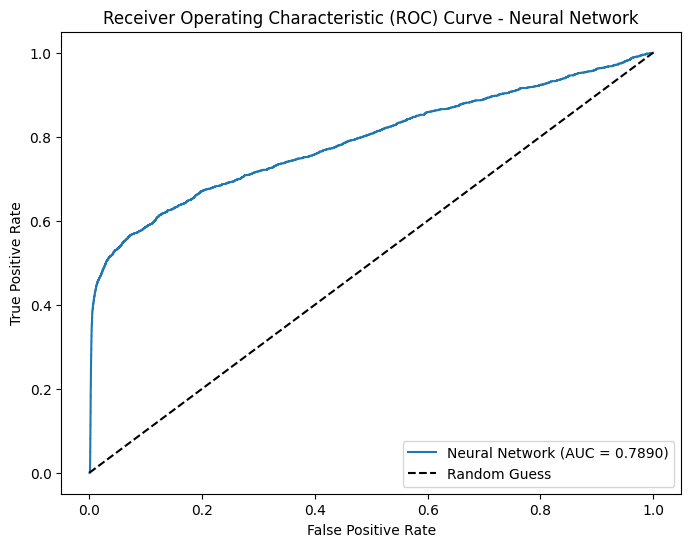

In [22]:
# feature scaling
scaler = StandardScaler()
features_train_balanced_scaled = scaler.fit_transform(features_train_balanced)
features_test_scaled = scaler.transform(features_test)

# converting data into PyTorch tensors
features_train_tensor = torch.tensor(features_train_balanced_scaled, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train_balanced, dtype=torch.float32).view(-1, 1)
features_test_tensor = torch.tensor(features_test_scaled, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test, dtype=torch.float32).view(-1, 1)

# here defining the neural network model
class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(features_train_tensor.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# setting and train the above model
model = FraudDetectionNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# here is training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(features_train_tensor)
    loss = criterion(outputs, target_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 1 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# now lets evaluate the model
model.eval()
with torch.no_grad():
    predictions_nn = model(features_test_tensor)
    predicted_labels = (predictions_nn >= 0.5).float()

# see the evaluation metrics for Neural Network
accuracy_nn = accuracy_score(target_test, predicted_labels.numpy())
precision_nn, recall_nn, f1_nn, _ = precision_recall_fscore_support(target_test, predicted_labels.numpy(), average='binary')
roc_auc_nn = roc_auc_score(target_test, predicted_labels.numpy())

# showing evaluation results for NN
print(f"\nNeural Network Model Evaluation:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")
print(f"AUC-ROC: {roc_auc_nn:.4f}")

# getting true labels as numpy array
y_test_np = target_test_tensor.numpy()

# getting predicted probabilities (before thresholding)
y_pred_probs = predictions_nn.numpy()

# calculating the False Positive Rate and True Positive Rate for ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test_np, y_pred_probs)

# Calculate AUC (Area Under the Curve)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = {:.4f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The model of Neural Network after 10 epochs exhibited progressive learning as reflected by the losses, which were dropping. It produced relatively good accuracy in the discrimination of fraudulent from legitimate transactions with an accuracy of 0.9703; however, precision was very low at 0.0645, meaning that the model struggles very much in the identification of fraud calls with regards to the specificity issue highlighted above. The recall of 0.4956 is moderate, meaning that although some fraudulent transactions were picked up by the model, most recalls of actual fraudulent transactions were missed. The F1-score of 0.1142 is the scope for improvement in the model in order to be well-balanced and performance-wise. Finally, the AUC-ROC of 0.7339 indicates that the model has a capacity to distinguish between classes to some extent, so it needs to be optimized to allow further enhancement in precision and overall fraud detection accuracy.

In this step, we are visualizing the performance of three different models (Random Forest, TabNet, and Neural Network) by generating confusion matrices.

1. **Random Forest Confusion Matrix**:
   - ConfusionMatrixDisplay.from_predictions is used to compare the true labels (target_test) and the predicted labels from the Random Forest model (rf_predictions).
   - The matrix shows how many instances were correctly or incorrectly classified as either "Non-Fraud" or "Fraud."

2. **TabNet Confusion Matrix**:
   - Similarly, the confusion matrix for the TabNet model is generated using the true labels (target_test) and the predictions from the TabNet model (tabnet_predictions).

3. **Neural Network Confusion Matrix**:
   - For the Neural Network, the predicted labels are obtained after applying a threshold to the model's continuous outputs. These predictions are compared with the true labels (target_test) to form the confusion matrix.

<Figure size 600x400 with 0 Axes>

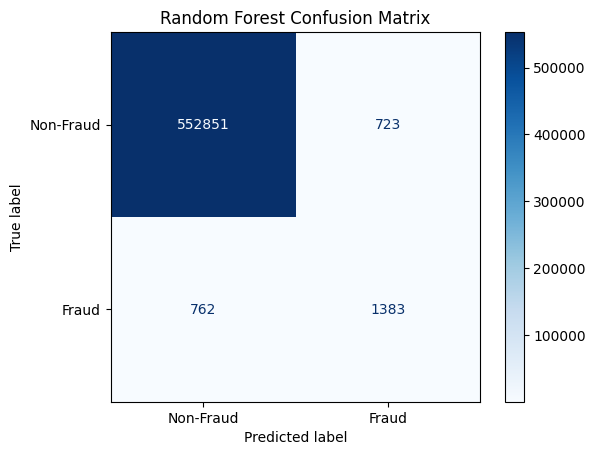

<Figure size 600x400 with 0 Axes>

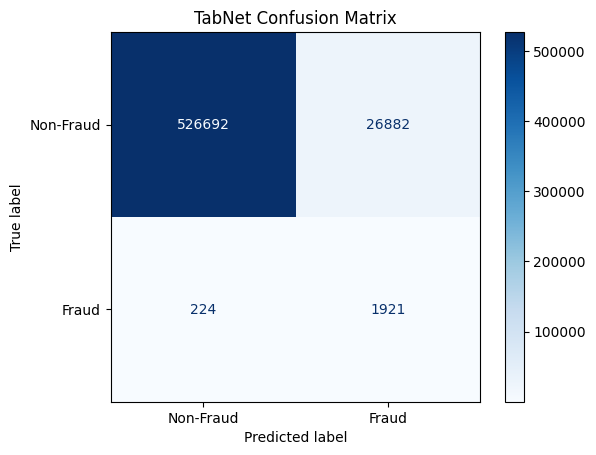

<Figure size 600x400 with 0 Axes>

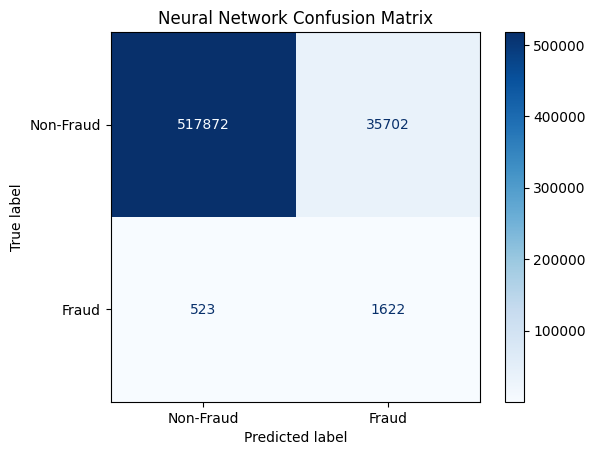

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(target_test, rf_predictions, display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# TabNet Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(target_test, tabnet_predictions, display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
plt.title('TabNet Confusion Matrix')
plt.show()

# Neural Network Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(target_test, predicted_labels.numpy(), display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.show()


### **Conclusion:**

The intention of this project was to build an efficient fraud detection system for credit card transactions using advanced machine learning techniques. Considering class imbalance and the changing nature of fraud, the system was devised to minimize the false positives of legitimate transactions in identifying the fraudulent ones. The models' performance was evaluated by precision, recall, F1-score, and AUC-ROC metrics to ensure the effectiveness of the system.

The **Random Forest** model performed pretty well with an accuracy of 0.9973 and had an AUC-ROC of 0.8217. However, the model lost its balance between false positives and false negatives, which was represented by its F1-score of 0.6507. The treatment of class imbalance in this model was effective as it used SMOTE.

Also, the model **TabNet**, being based on transformer architecture, performed the best in AUC-ROC with a value of 0.9235; however it involves low precision (0.0667) and very high recall (0.8956) indicating many false alarms, and F1-score is 0.1241 meaning that improvement of the precision is much required.

The **Neural Network** model performed decently with an accuracy of 0.9703 but the low precision and F1-score (0.1142) suggest that a lot of scope is there to improve its rankings for fraudulent transactions.

In conclusion, the most robust model proved to be **Random Forest**, and **TabNet** showed promise with further adjustments. **Neural Networks** need further fine-tuning to enhance their performance. Future work should focus on improving precision, exploring transformer-based architectures, and refining feature engineering techniques to improve fraud detection accuracy.